In [1]:
import numpy as np
from src.run_shap import load_shap_vals
import pickle
from tqdm import tqdm
from src.utils import token_segments
from src.dataset_info import get_dataset_info
from transformers import AutoTokenizer
import shap

# %matplotlib inline
import matplotlib.pyplot as plt

# plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd


/home/james/CodingProjects/TextNTabularExplanations/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
text_model_base = "distilbert-base-uncased"
text_model_code = "disbert"

## Colon and column names separated


        #################
        fake
        #################
        


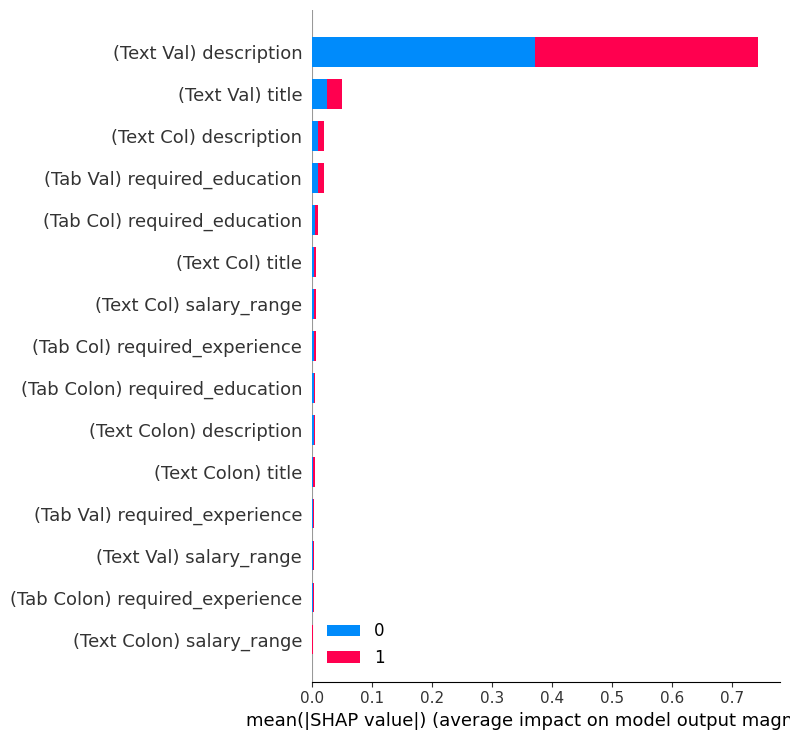

No model type specified for jigsaw. (This is fine during dataset creation)



        #################
        jigsaw
        #################
        


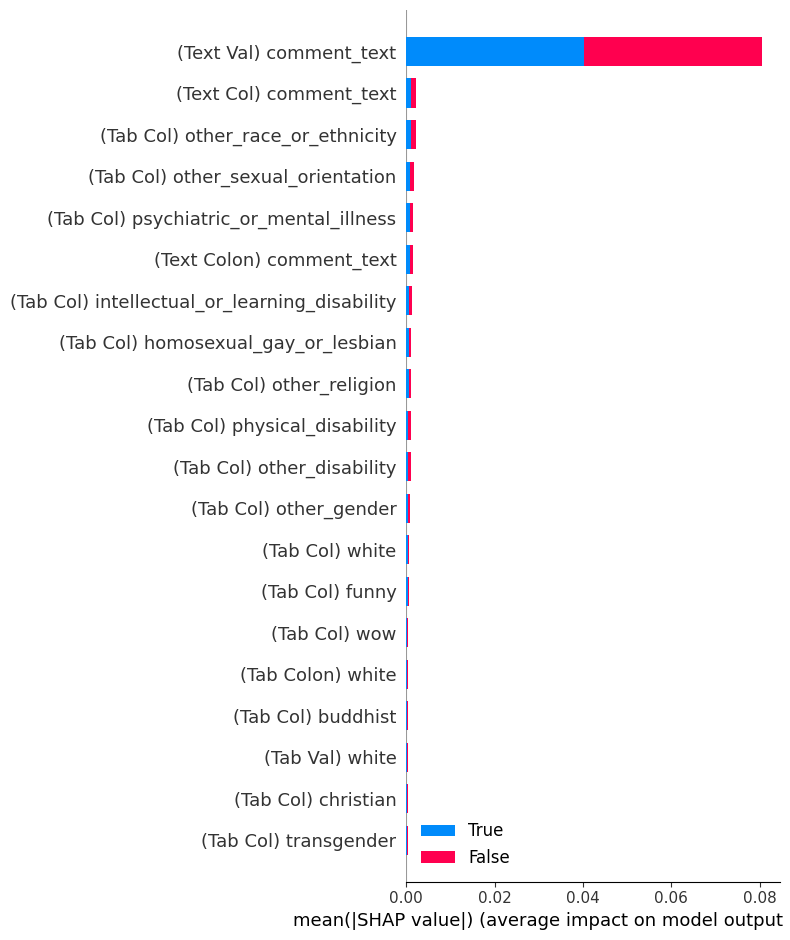

No model type specified for kick. (This is fine during dataset creation)



        #################
        kick
        #################
        


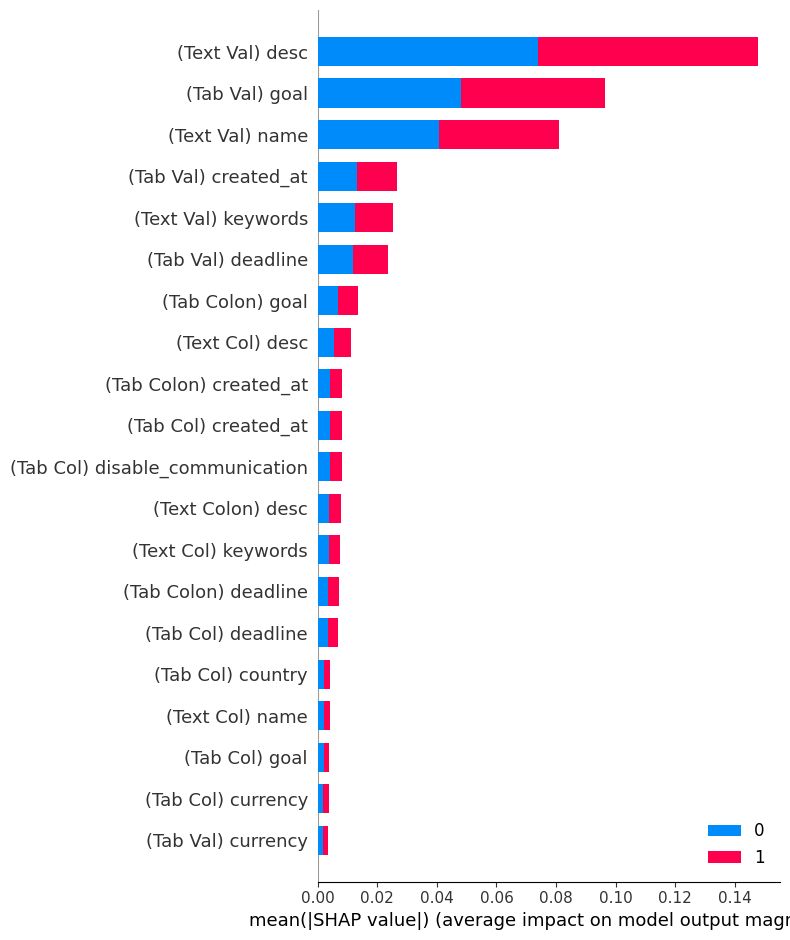

No model type specified for wine. (This is fine during dataset creation)



        #################
        wine
        #################
        


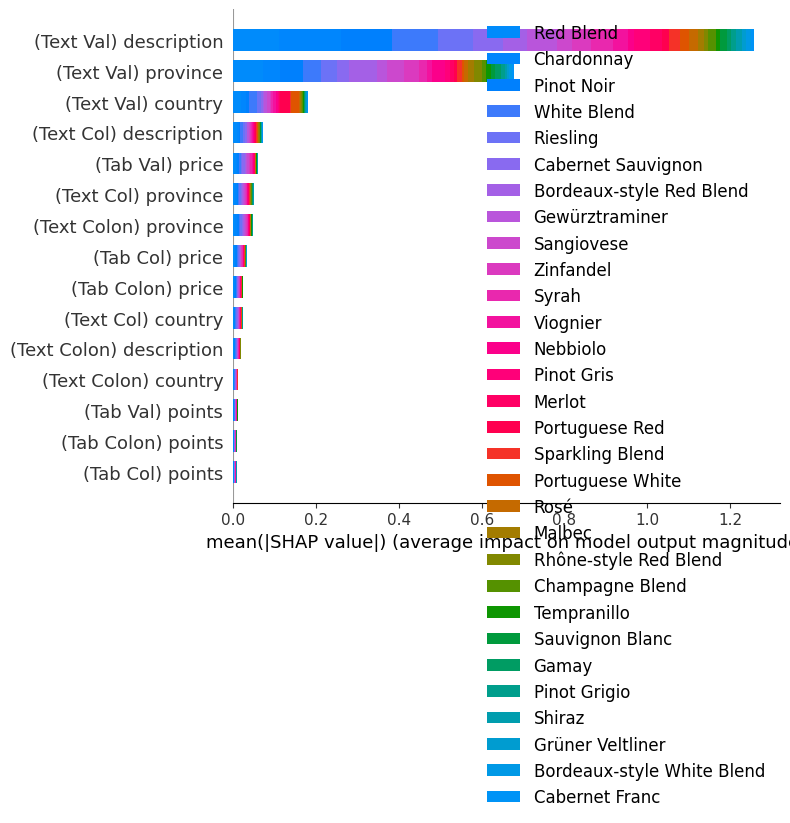

No model type specified for imdb_genre. (This is fine during dataset creation)



        #################
        imdb_genre
        #################
        


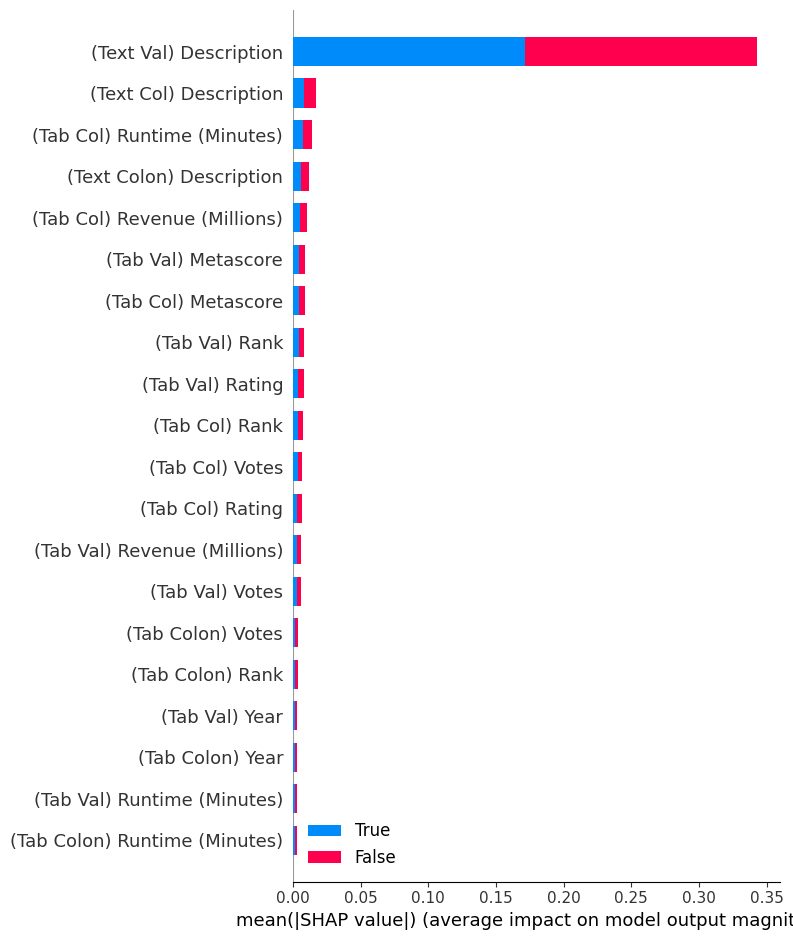

No model type specified for prod_sent. (This is fine during dataset creation)



        #################
        prod_sent
        #################
        


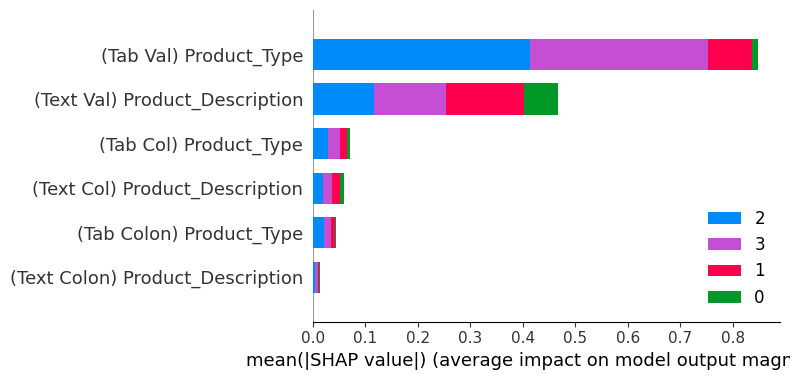

In [9]:
tab_scale_factor = 1

for ds_name in ["fake", "jigsaw", "kick", "wine", "imdb_genre", "prod_sent"]:
    tab_scale_factor = 1
    di = get_dataset_info(ds_name)
    tokenizer = AutoTokenizer.from_pretrained(text_model_base)

    pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    col_name_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/col_names_shap_vals_all_text_baseline.pkl"
    colon_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/colon_shap_vals_all_text_baseline.pkl"
    fts_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/summed_shap_vals_all_text_baseline.pkl"

    tab_pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    print(
        f"""
        #################
        {ds_name}
        #################
        """
    )
    with open(col_name_filepath, "rb") as f:
        grouped_col_name_shap_vals = pickle.load(f)
    with open(colon_filepath, "rb") as f:
        grouped_colon_shap_vals = pickle.load(f)
    with open(fts_filepath, "rb") as f:
        grouped_shap_vals = pickle.load(f)
    val_only = grouped_shap_vals - grouped_col_name_shap_vals - grouped_colon_shap_vals
    shap.summary_plot(
        list(
            np.concatenate(
                [
                    val_only,
                    grouped_col_name_shap_vals,
                    grouped_colon_shap_vals,
                ],
                axis=2,
            )
        ),
        features=[f"(Tab Val) {col}" for col in di.tab_cols]
        + [f"(Text Val) {col}" for col in di.text_cols]
        + [f"(Tab Col) {col}" for col in di.tab_cols]
        + [f"(Text Col) {col}" for col in di.text_cols]
        + [f"(Tab Colon) {col}" for col in di.tab_cols]
        + [f"(Text Colon) {col}" for col in di.text_cols],
        class_names=di.label_names,
    )


## Column names and colons together


        #################
        fake
        #################
        


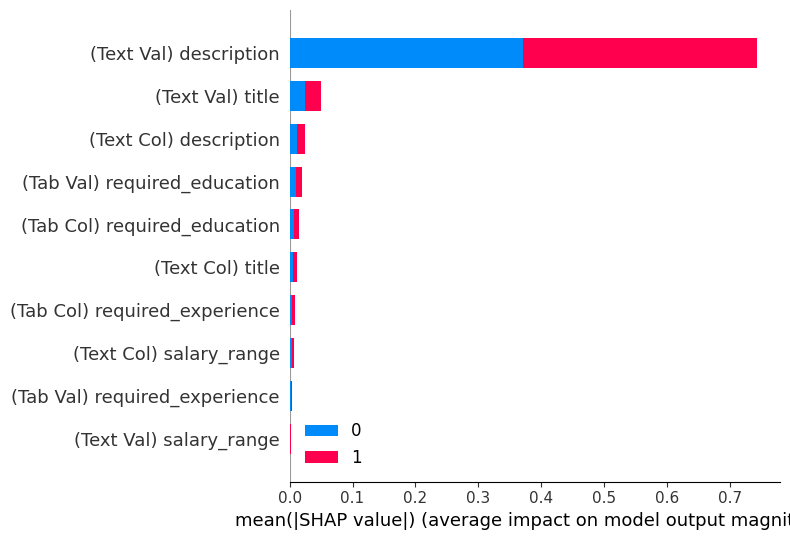


        #################
        jigsaw
        #################
        


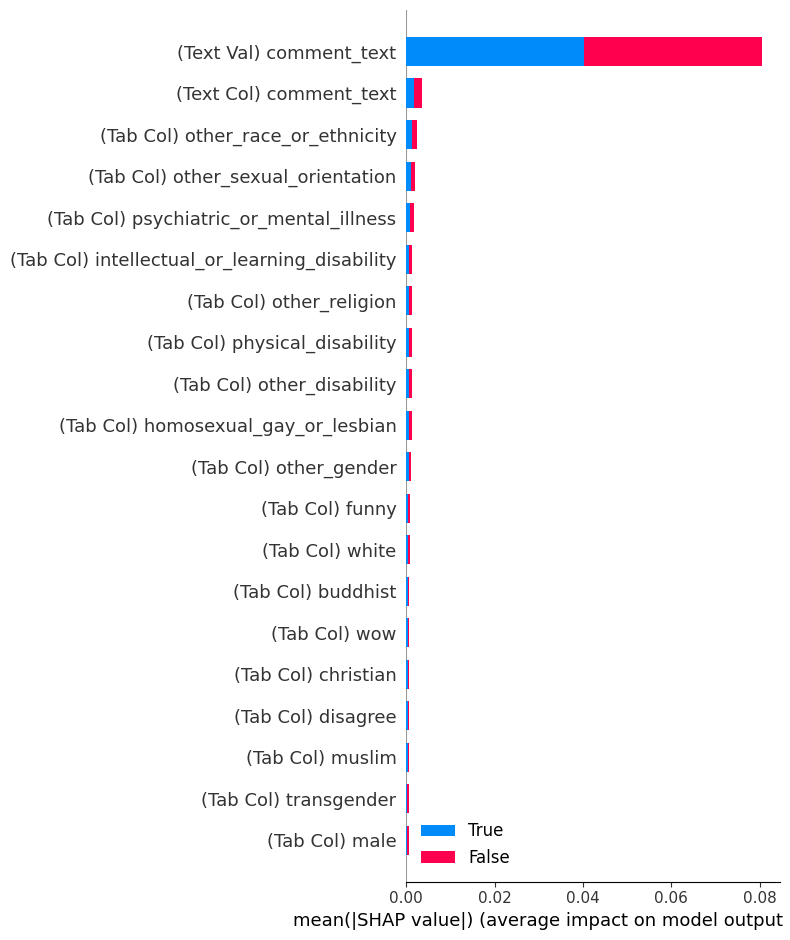


        #################
        kick
        #################
        


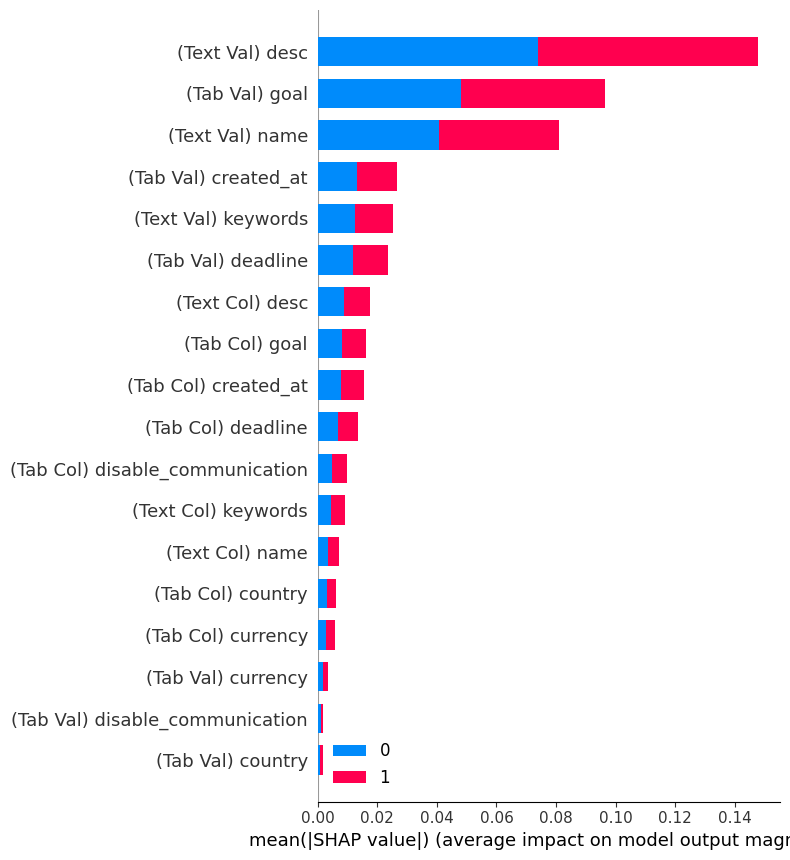


        #################
        wine
        #################
        


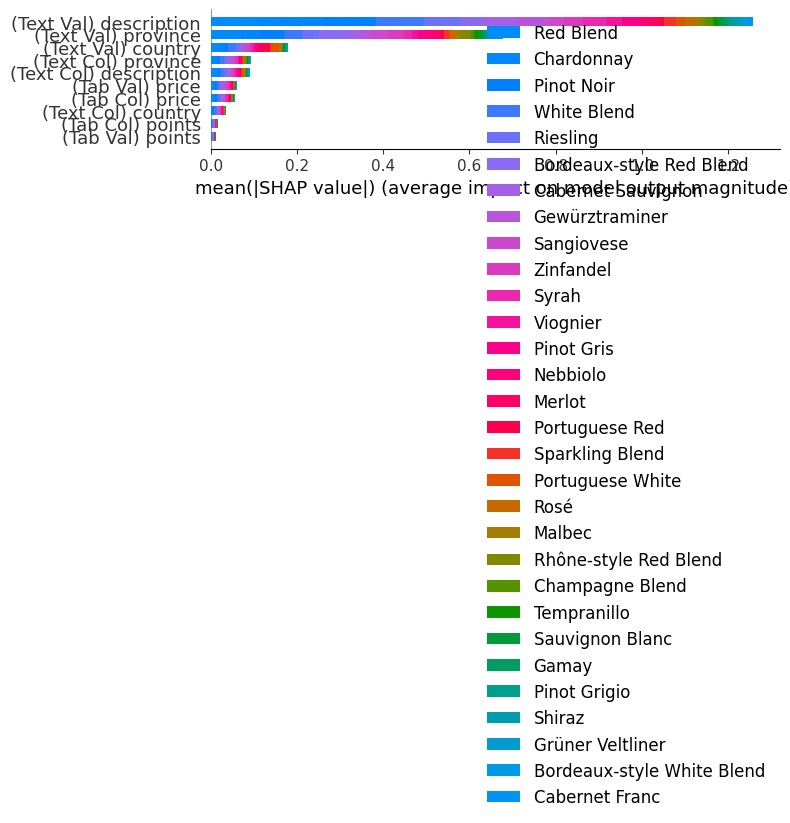


        #################
        imdb_genre
        #################
        


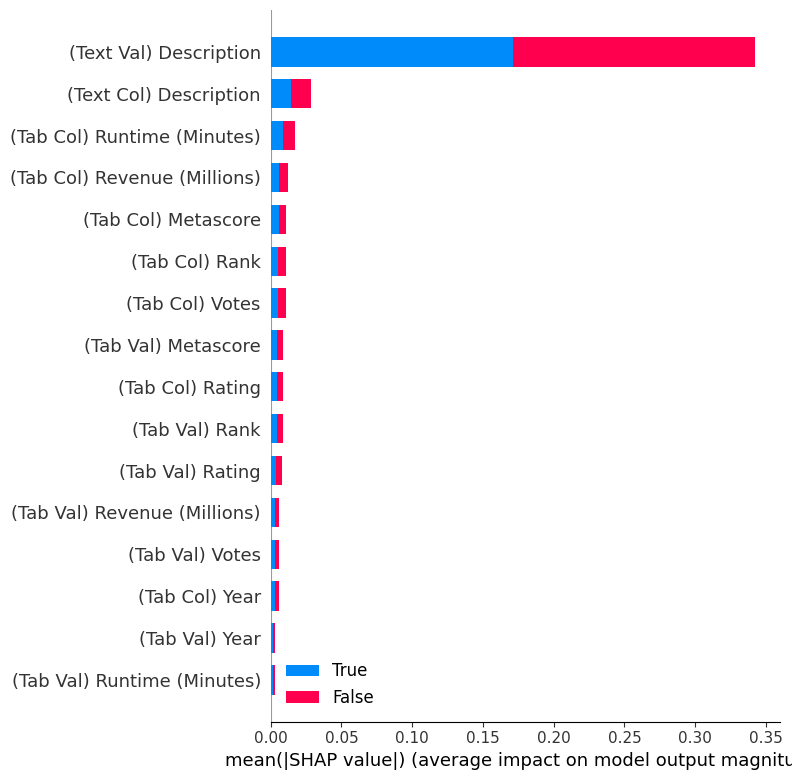


        #################
        prod_sent
        #################
        


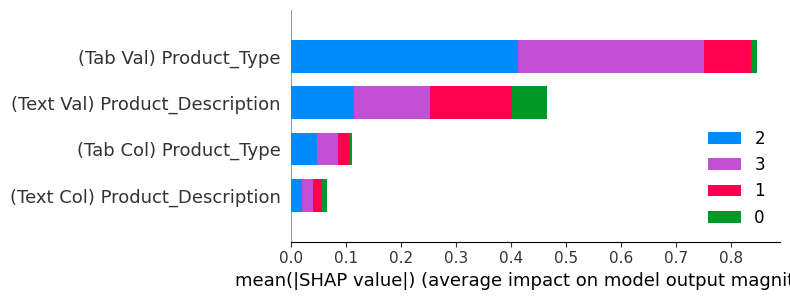

In [10]:
for ds_name in ["fake", "jigsaw", "kick", "wine", "imdb_genre", "prod_sent"]:
    tab_scale_factor = 1
    di = get_dataset_info(ds_name)
    tokenizer = AutoTokenizer.from_pretrained(text_model_base)

    pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    col_name_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/col_names_shap_vals_all_text_baseline.pkl"
    colon_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/colon_shap_vals_all_text_baseline.pkl"
    fts_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/summed_shap_vals_all_text_baseline.pkl"

    tab_pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    print(
        f"""
        #################
        {ds_name}
        #################
        """
    )
    with open(col_name_filepath, "rb") as f:
        grouped_col_name_shap_vals = pickle.load(f)
    with open(colon_filepath, "rb") as f:
        grouped_colon_shap_vals = pickle.load(f)
    with open(fts_filepath, "rb") as f:
        grouped_shap_vals = pickle.load(f)
    val_only = grouped_shap_vals - grouped_col_name_shap_vals - grouped_colon_shap_vals
    col_plus_colon = grouped_col_name_shap_vals + grouped_colon_shap_vals
    shap.summary_plot(
        list(
            np.concatenate(
                [
                    val_only,
                    col_plus_colon,
                ],
                axis=2,
            )
        ),
        features=[f"(Tab Val) {col}" for col in di.tab_cols]
        + [f"(Text Val) {col}" for col in di.text_cols]
        + [f"(Tab Col) {col}" for col in di.tab_cols]
        + [f"(Text Col) {col}" for col in di.text_cols],
        class_names=di.label_names,
    )


## Column name and colon values as a proportion of value

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


### Values

In [12]:
for ds_name in ["fake", "jigsaw", "kick", "wine", "imdb_genre", "prod_sent"]:
    tab_scale_factor = 1
    di = get_dataset_info(ds_name)
    tokenizer = AutoTokenizer.from_pretrained(text_model_base)

    pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    col_name_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/col_names_shap_vals_all_text_baseline.pkl"
    colon_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/colon_shap_vals_all_text_baseline.pkl"
    fts_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/summed_shap_vals_all_text_baseline.pkl"

    tab_pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    print(
        f"""
        #################
        {ds_name}
        #################
        """
    )
    with open(col_name_filepath, "rb") as f:
        grouped_col_name_shap_vals = pickle.load(f)
    with open(colon_filepath, "rb") as f:
        grouped_colon_shap_vals = pickle.load(f)
    with open(fts_filepath, "rb") as f:
        grouped_shap_vals = pickle.load(f)
    col_plus_colon = grouped_col_name_shap_vals + grouped_colon_shap_vals
    # - np.abs(grouped_colon_shap_vals)
    val_only = grouped_shap_vals - col_plus_colon

    # By class
    for class_i, val_class in enumerate(val_only):
        print(f"Class {class_i}")
        ft_avgs = []
        for ft in range(val_only.shape[2]):
            val_ft = val_class[:, ft]
            col_plus_colon_ft = col_plus_colon[class_i, :, ft]
            ft_avgs.append(
                (
                    np.abs(col_plus_colon_ft[val_ft != 0]
                           ) / np.abs(val_ft[val_ft != 0])
                ).mean()
            )
        print(f"Mean(|Col name|/|Col Value|): {ft_avgs}")
        if val_only.shape[0] == 2:
            break
    print(
        f"Mean(|Col name|/|Col Value|): {(np.abs(col_plus_colon[val_only != 0])/np.abs(val_only[val_only != 0])).mean()}"
    )

No model type specified for fake. (This is fine during dataset creation)
No model type specified for jigsaw. (This is fine during dataset creation)



        #################
        fake
        #################
        
Class 0
Mean(|Col name|/|Col Value|): [3.3284106904974884, 2.514752149462814, 0.9271539992767142, 0.36154090277931294, 9.233151104055091]
Mean(|Col name|/|Col Value|): 3.212833688982291

        #################
        jigsaw
        #################
        
Class 0
Mean(|Col name|/|Col Value|): [1.7866666666666666, 2.6734914057219474, 2.6796426483590388, 2.6834447160163744, 2.6971485379096247, 2.677449261360611, 2.679819778354177, 2.679893141673007, 2.6650391722578046, 8.093564080167205, 10.118310098772696, 2.6690548113279977, 4.812008341256798, 2.722278525940224, 2.0869953899460367, 5.570682853687605, 4.486583921595002, 7.754856937290518, 4.726175634287306, 8.352269087750301, 5.087350732466893, 21.219224001249575, 2.590922145594244, 3.8550553937403684, 4.863265601103901, 3.279772479019434, 3.1296169105645593, 2.9635750201948228, 2.7208420103743096, 0.14981596145669024]
Mean(|Col name|/|Col Value|): 4.48250

No model type specified for kick. (This is fine during dataset creation)
No model type specified for wine. (This is fine during dataset creation)



        #################
        wine
        #################
        
Class 0
Mean(|Col name|/|Col Value|): [2.3437251567549833, 4.306614100882841, 3.084469961177919, 0.3590201612835523, 0.5157241297348274]
Class 1
Mean(|Col name|/|Col Value|): [2.065918935754095, 2.1346815444777176, 2.8050682160176508, 0.08948621341413214, 0.3551038865088344]
Class 2
Mean(|Col name|/|Col Value|): [3.01472635914585, 3.5728103267836473, 1.6873589068156525, 0.23796907977455065, 0.3021573497438291]
Class 3
Mean(|Col name|/|Col Value|): [1.9459758242431686, 1.5431256043330779, 1.7114154032754316, 0.18691114157970481, 0.3908334548189685]
Class 4
Mean(|Col name|/|Col Value|): [1.9716730604700539, 2.193686270207013, 2.0494315007240163, 0.08107535932624314, 0.6454711076343065]
Class 5
Mean(|Col name|/|Col Value|): [2.1874564753769556, 2.260068191570644, 2.177130339715403, 0.09425087034468933, 0.5469956890401518]
Class 6
Mean(|Col name|/|Col Value|): [1.9750417560497566, 5.836358217292461, 1.89312299744115

No model type specified for imdb_genre. (This is fine during dataset creation)
No model type specified for prod_sent. (This is fine during dataset creation)



        #################
        prod_sent
        #################
        
Class 0
Mean(|Col name|/|Col Value|): [1.1499865214117622, 0.21872335799304288]
Class 1
Mean(|Col name|/|Col Value|): [0.3204063016615584, 0.2215103114195933]
Class 2
Mean(|Col name|/|Col Value|): [0.1413003406262026, 0.4256581052179711]
Class 3
Mean(|Col name|/|Col Value|): [0.18092835466220272, 1.102026116286448]
Mean(|Col name|/|Col Value|): 0.47006742615984765


### Charts


        #################
        fake
        #################
        


The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.


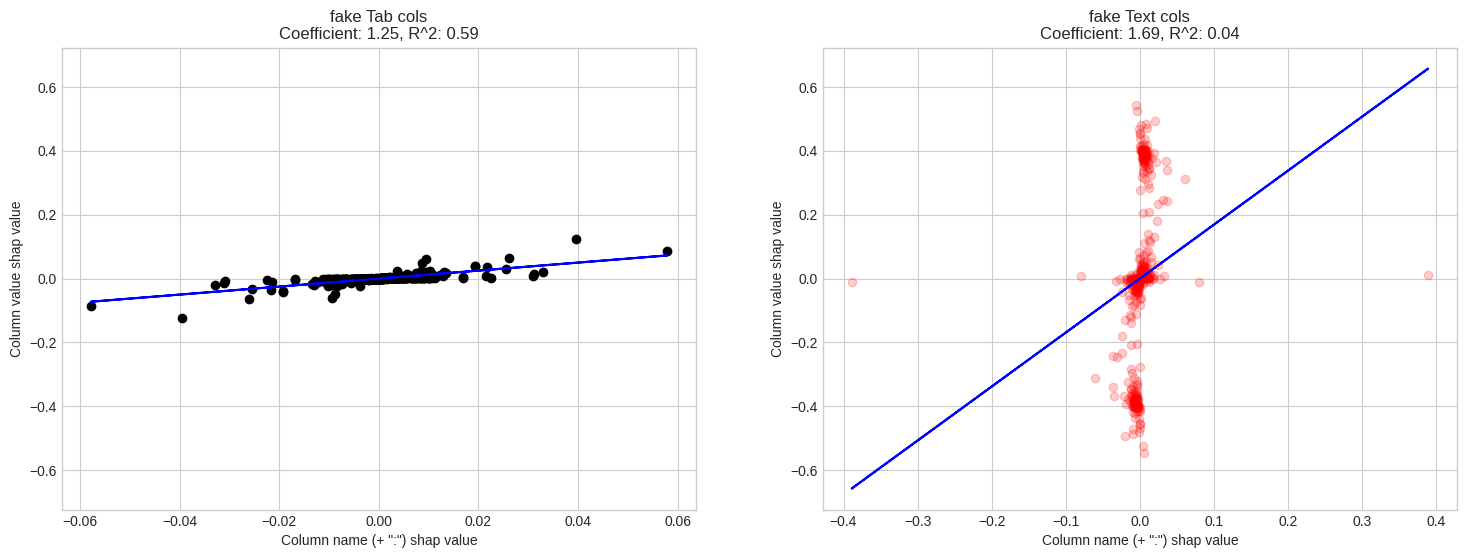


        #################
        jigsaw
        #################
        


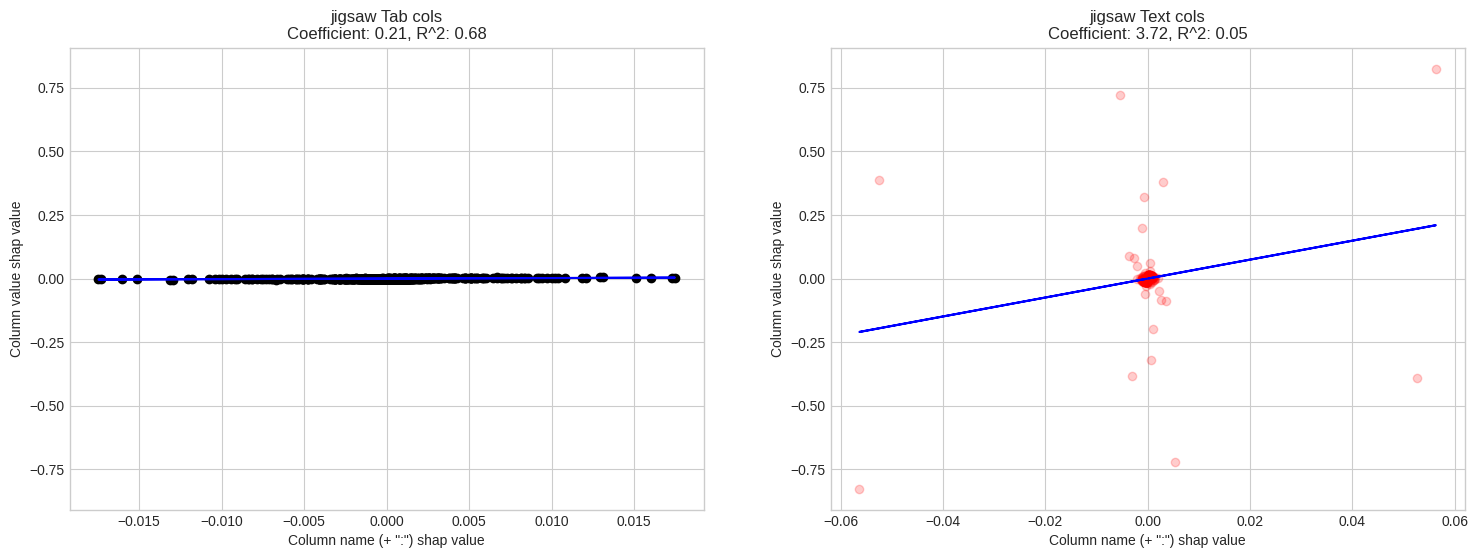


        #################
        kick
        #################
        


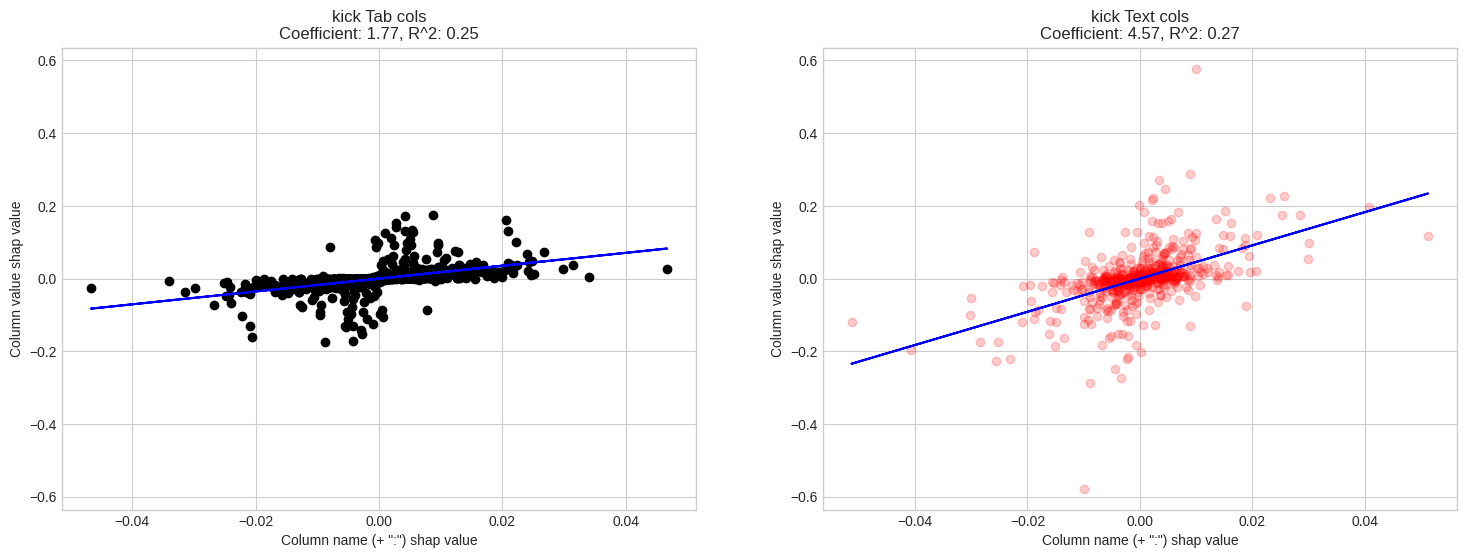


        #################
        wine
        #################
        


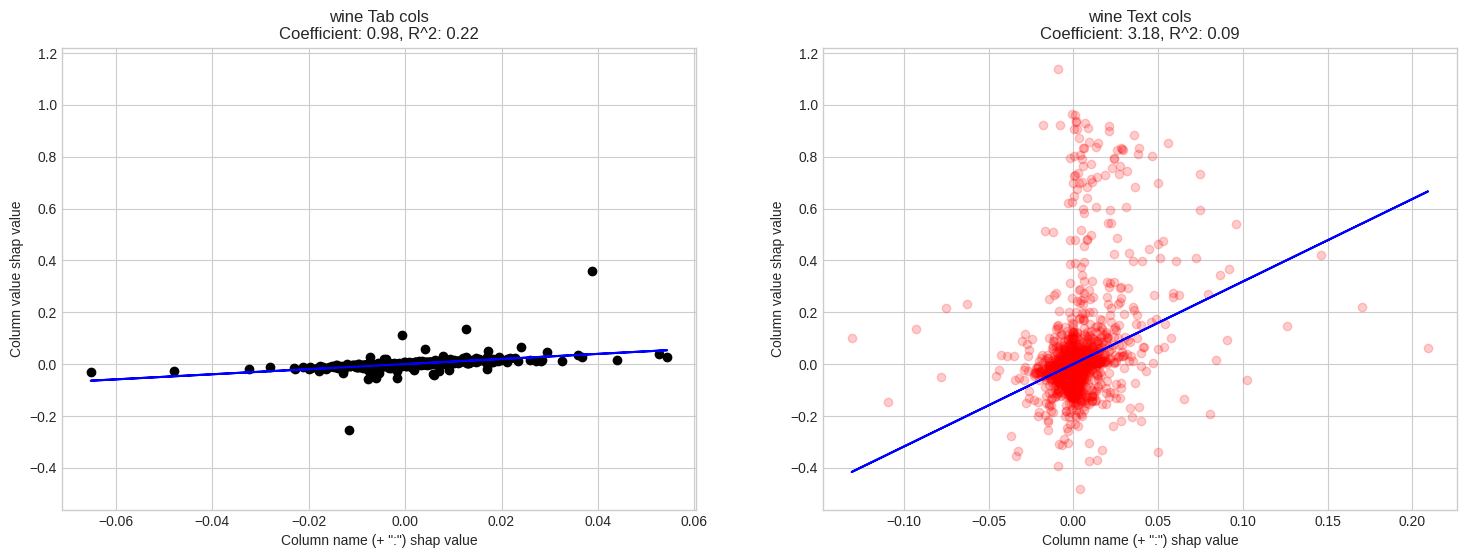


        #################
        imdb_genre
        #################
        


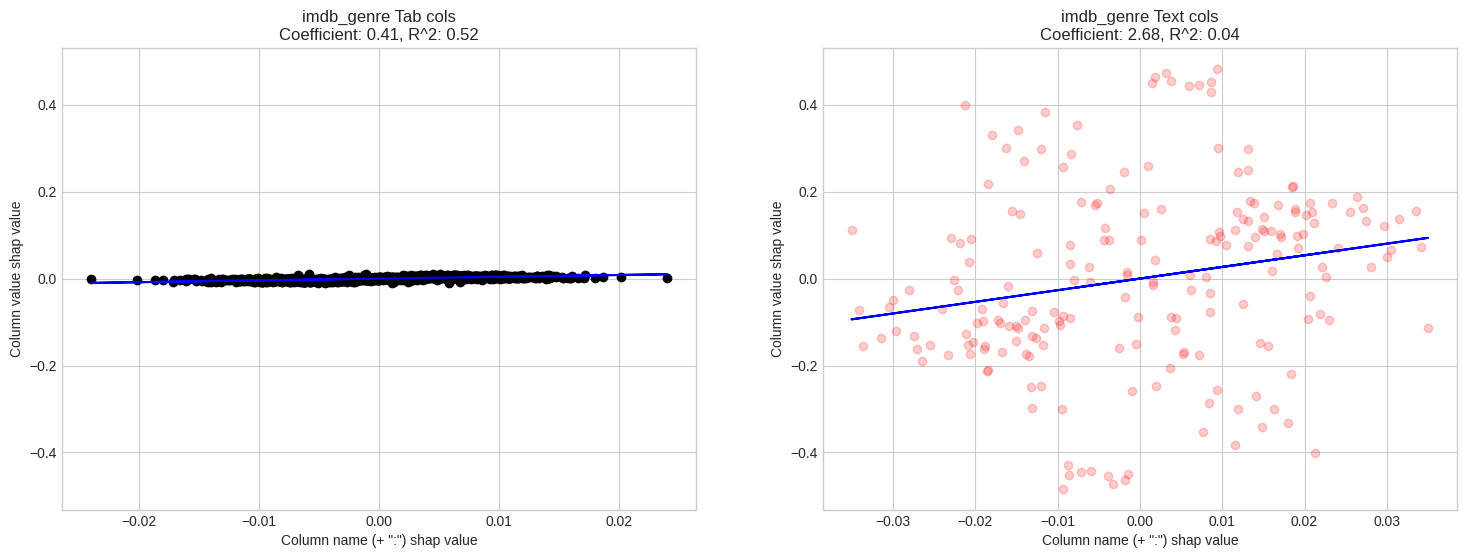


        #################
        prod_sent
        #################
        


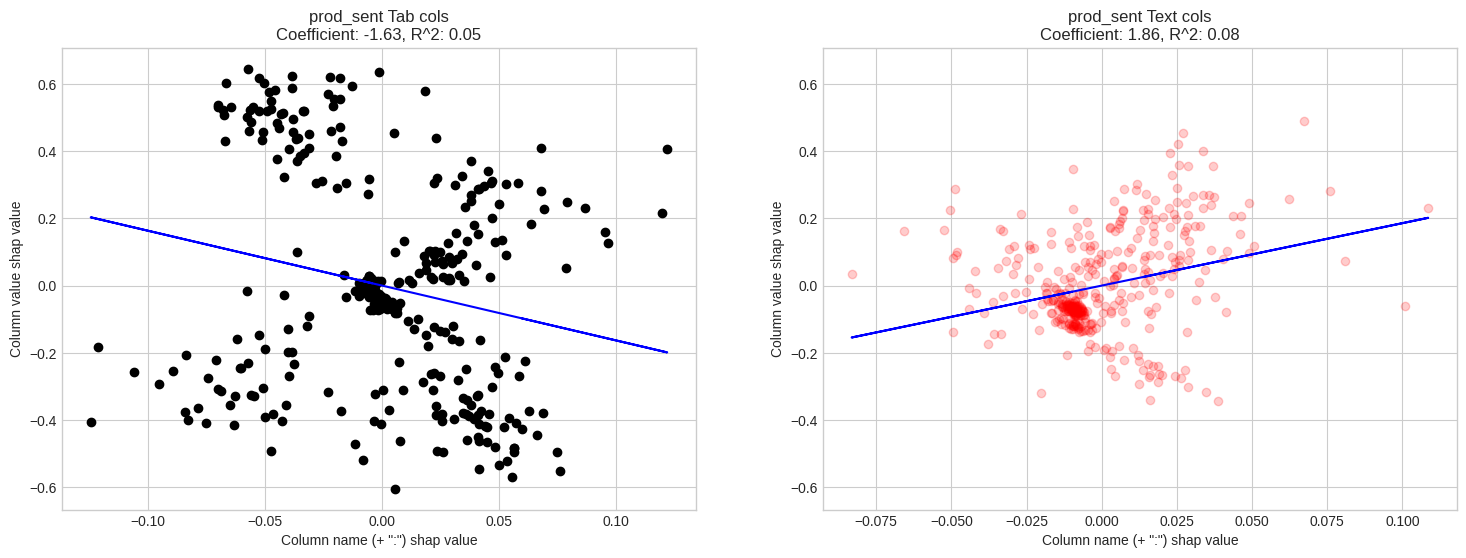

In [13]:
for ds_name in ["fake", "jigsaw", "kick", "wine", "imdb_genre", "prod_sent"]:
    tab_scale_factor = 1
    di = get_dataset_info(ds_name)
    tokenizer = AutoTokenizer.from_pretrained(text_model_base)

    pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    col_name_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/col_names_shap_vals_all_text_baseline.pkl"
    colon_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/colon_shap_vals_all_text_baseline.pkl"
    fts_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/summed_shap_vals_all_text_baseline.pkl"

    tab_pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    print(
        f"""
        #################
        {ds_name}
        #################
        """
    )
    with open(col_name_filepath, "rb") as f:
        grouped_col_name_shap_vals = pickle.load(f)
    with open(colon_filepath, "rb") as f:
        grouped_colon_shap_vals = pickle.load(f)
    with open(fts_filepath, "rb") as f:
        grouped_shap_vals = pickle.load(f)
    col_plus_colon = grouped_col_name_shap_vals + grouped_colon_shap_vals
    # - np.abs(grouped_colon_shap_vals)
    val_only = grouped_shap_vals - col_plus_colon

    # Create a figure and axes
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(18, 6)
    )  # Set figsize to (12, 6) for twice the width

    # Plot the tab columns
    x1 = col_plus_colon[:, :, : len(di.tab_cols)].flatten()
    y1 = val_only[:, :, : len(di.tab_cols)].flatten()
    ax1.plot(x1, y1, "o", color="black")

    # Add the best-fit line
    # Fit a first-degree (linear) polynomial
    coefficients1 = np.polyfit(x1, y1, 1)
    best_fit1 = np.polyval(coefficients1, x1)
    ax1.plot(x1, best_fit1, color="blue")

    # Calculate r^2 value
    correlation_matrix1 = np.corrcoef(x1, y1)
    correlation_coefficient1 = correlation_matrix1[0, 1]
    r_squared1 = correlation_coefficient1**2

    # Set the labels
    ax1.set_title(
        ds_name
        + " Tab cols\nCoefficient: {:.2f}, R^2: {:.2f}".format(
            coefficients1[0], r_squared1
        )
    )
    ax1.set_xlabel('Column name (+ ":") shap value')
    ax1.set_ylabel("Column value shap value")

    # Plot the text columns
    x2 = col_plus_colon[:, :, len(di.tab_cols):].flatten()
    y2 = val_only[:, :, len(di.tab_cols):].flatten()
    ax2.plot(x2, y2, "o", color="red", alpha=0.2)

    # Add the best-fit line
    # Fit a first-degree (linear) polynomial
    coefficients2 = np.polyfit(x2, y2, 1)
    best_fit2 = np.polyval(coefficients2, x2)
    ax2.plot(x2, best_fit2, color="blue")

    # Calculate r^2 value
    correlation_matrix2 = np.corrcoef(x2, y2)
    correlation_coefficient2 = correlation_matrix2[0, 1]
    r_squared2 = correlation_coefficient2**2

    # Set the labels
    ax2.set_title(
        ds_name
        + " Text cols\nCoefficient: {:.2f}, R^2: {:.2f}".format(
            coefficients2[0], r_squared2
        )
    )
    ax2.set_xlabel('Column name (+ ":") shap value')
    ax2.set_ylabel("Column value shap value")

    # Share the y-axis
    ax1.get_shared_y_axes().join(ax1, ax2)

    # Show the plot
    plt.show()

In [14]:
val_only.shape

(4, 100, 2)

In [15]:
val_only = grouped_shap_vals - grouped_col_name_shap_vals - grouped_colon_shap_vals

In [16]:
(val_only / grouped_shap_vals).mean(axis=2).mean(axis=1)


array([0.63675489, 0.85190867, 1.60056321, 1.13049684])

In [17]:
np.concatenate(
    [grouped_shap_vals, grouped_col_name_shap_vals, grouped_colon_shap_vals], axis=2
).shape


(4, 100, 6)


            #################
            fake
            #################
            


The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.


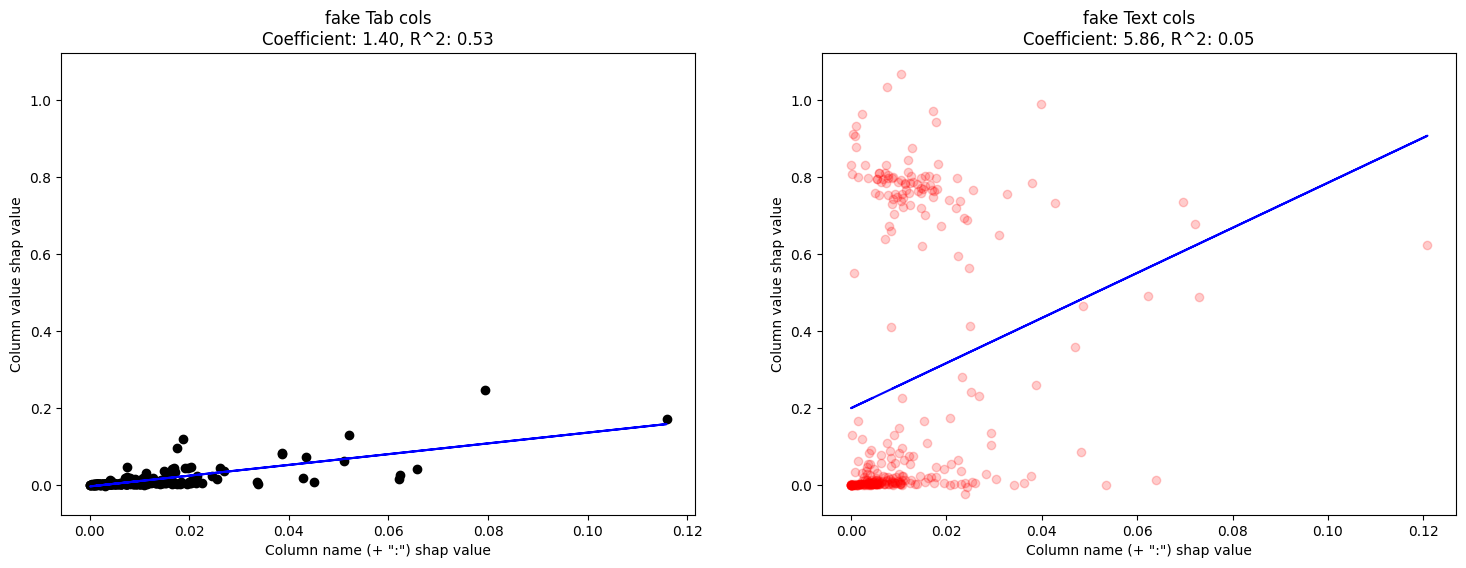

No model type specified for jigsaw. (This is fine during dataset creation)



            #################
            jigsaw
            #################
            


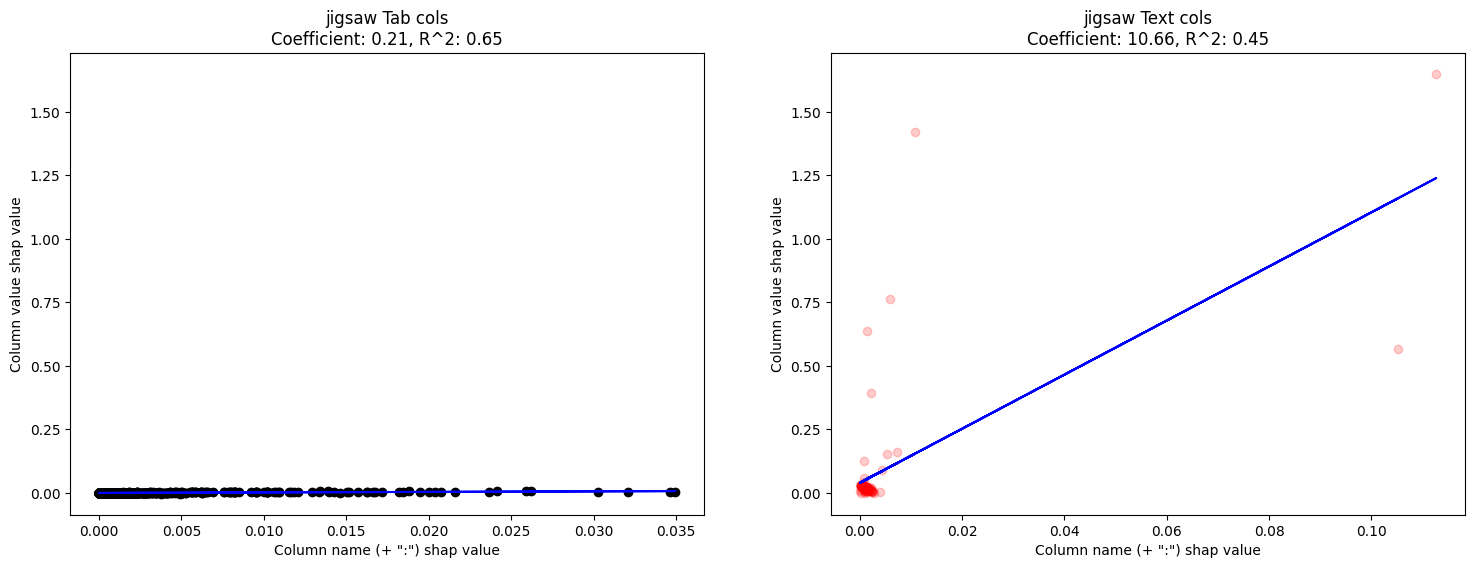

No model type specified for kick. (This is fine during dataset creation)



            #################
            kick
            #################
            


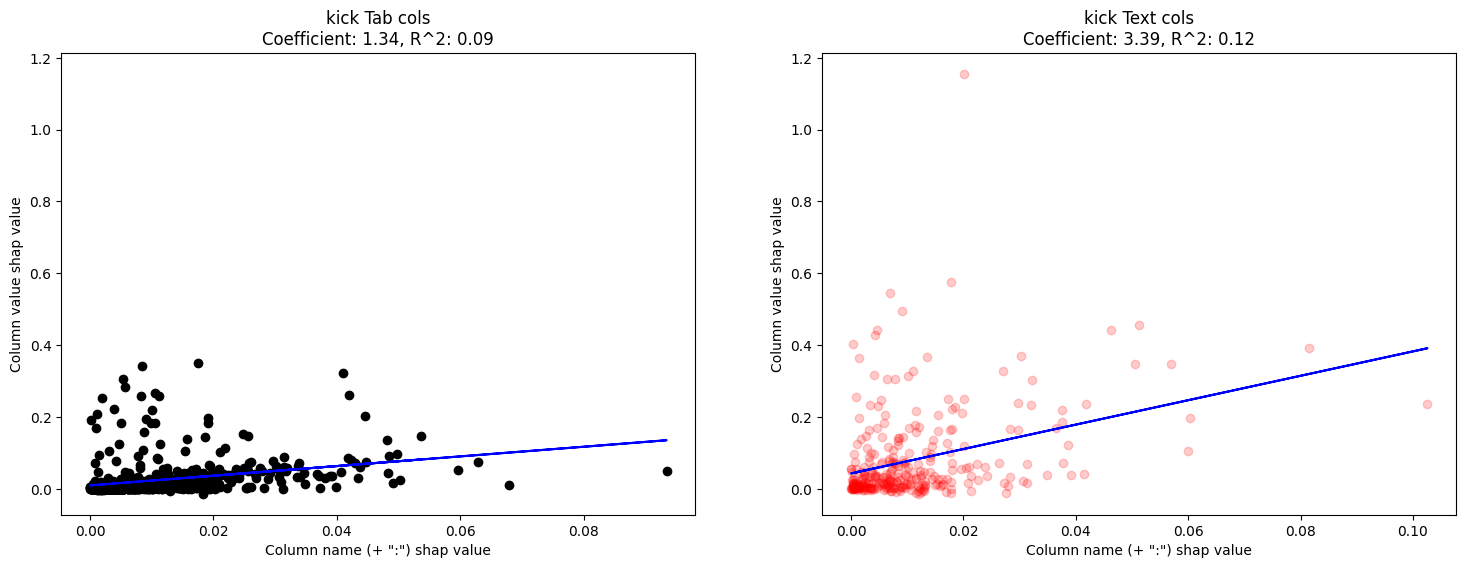

No model type specified for wine. (This is fine during dataset creation)



            #################
            wine
            #################
            


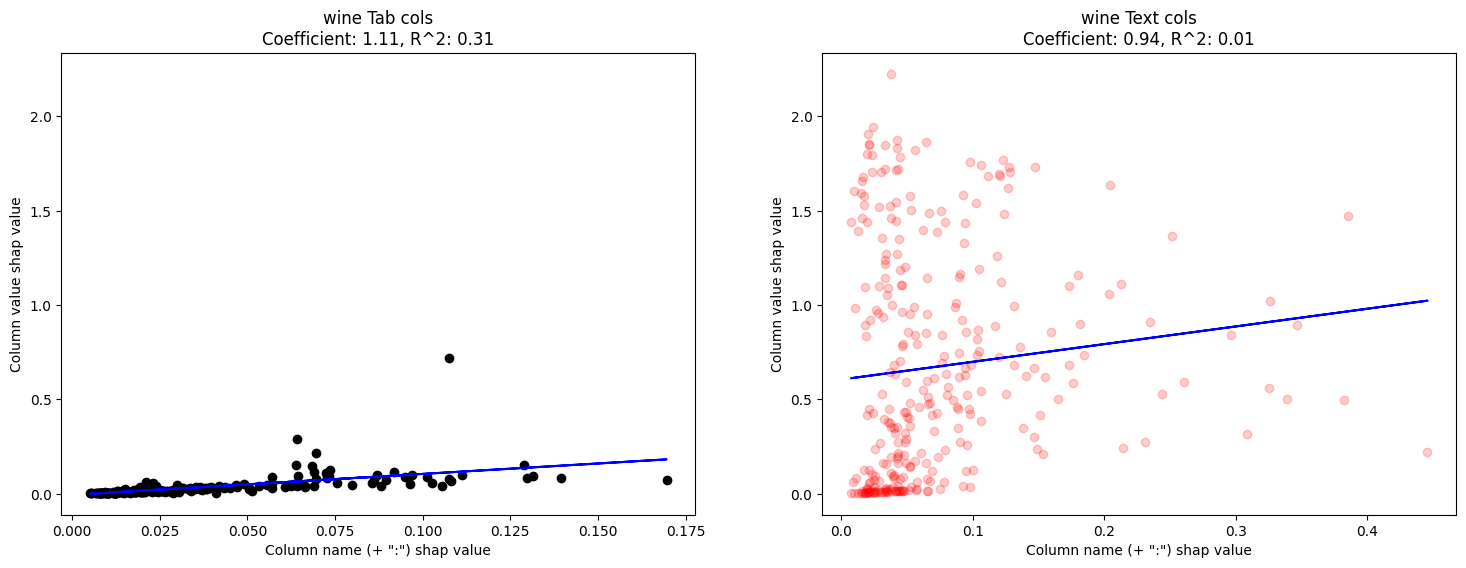

No model type specified for imdb_genre. (This is fine during dataset creation)



            #################
            imdb_genre
            #################
            


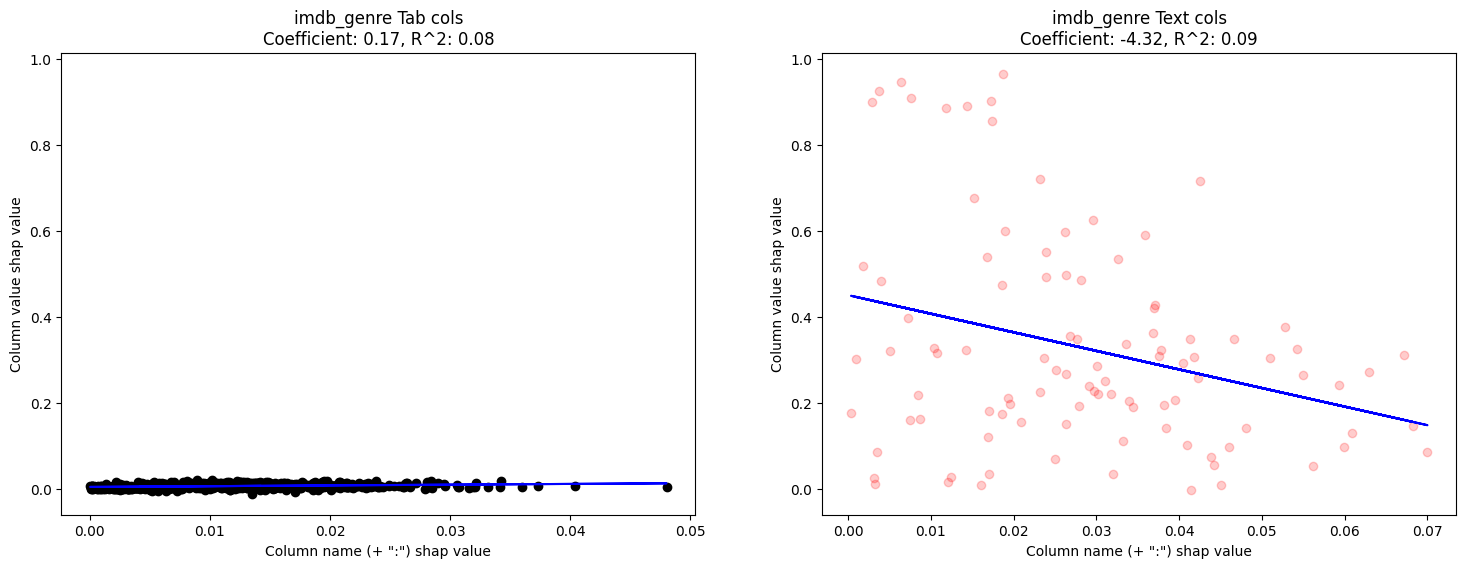

No model type specified for prod_sent. (This is fine during dataset creation)



            #################
            prod_sent
            #################
            


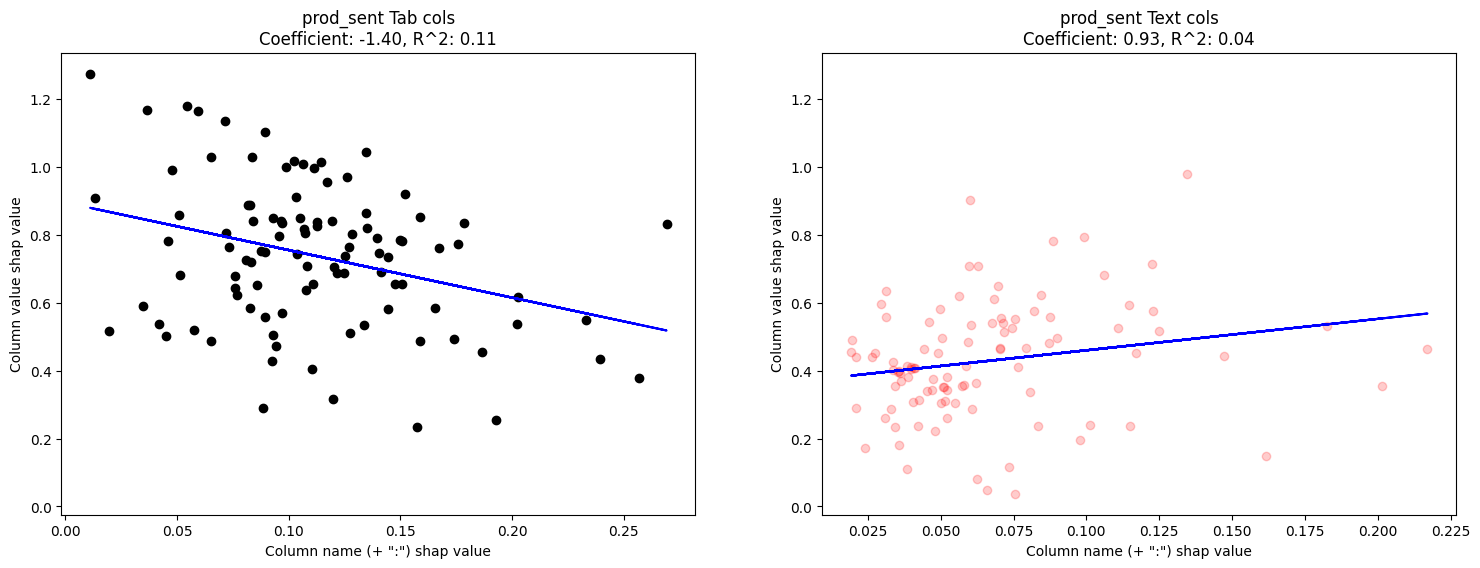

In [20]:
for text_model_code, text_model_base in [
    ("disbert", "distilbert-base-uncased"),
    # ("drob", "distilroberta-base"),
    # ("bert", "bert-base-uncased"),
    # ("deberta", "microsoft/deberta-v3-small")
]:
    for ds_name in ["fake", "jigsaw", "kick", "wine", "imdb_genre", "prod_sent"]:
        tab_scale_factor = 1
        di = get_dataset_info(ds_name)
        tokenizer = AutoTokenizer.from_pretrained(text_model_base)

        pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
        col_name_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/col_names_shap_vals_all_text_baseline.pkl"
        colon_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/colon_shap_vals_all_text_baseline.pkl"
        fts_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/summed_shap_vals_all_text_baseline.pkl"

        tab_pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
        print(
            f"""
            #################
            {ds_name}
            #################
            """
        )
        with open(col_name_filepath, "rb") as f:
            grouped_col_name_shap_vals = pickle.load(f)
        with open(colon_filepath, "rb") as f:
            grouped_colon_shap_vals = pickle.load(f)
        with open(fts_filepath, "rb") as f:
            grouped_shap_vals = pickle.load(f)
        col_plus_colon = grouped_col_name_shap_vals + grouped_colon_shap_vals

        both = zip()
        col_plus_colon = np.sum(np.abs(col_plus_colon), axis=0)
        grouped_shap_vals = np.sum(np.abs(grouped_shap_vals), axis=0)
        # - np.abs(grouped_colon_shap_vals)
        val_only = grouped_shap_vals - col_plus_colon

        # Create a figure and axes
        fig, (ax1, ax2) = plt.subplots(
            1, 2, figsize=(18, 6)
        )  # Set figsize to (12, 6) for twice the width

        # Plot the tab columns
        x1 = col_plus_colon[:, : len(di.tab_cols)].flatten()
        y1 = val_only[:, : len(di.tab_cols)].flatten()
        ax1.plot(x1, y1, "o", color="black")

        # Add the best-fit line
        # Fit a first-degree (linear) polynomial
        coefficients1 = np.polyfit(x1, y1, 1)
        best_fit1 = np.polyval(coefficients1, x1)
        ax1.plot(x1, best_fit1, color="blue")

        # Calculate r^2 value
        correlation_matrix1 = np.corrcoef(x1, y1)
        correlation_coefficient1 = correlation_matrix1[0, 1]
        r_squared1 = correlation_coefficient1**2

        # Set the labels
        ax1.set_title(
            ds_name
            + " Tab cols\nCoefficient: {:.2f}, R^2: {:.2f}".format(
                coefficients1[0], r_squared1
            )
        )
        ax1.set_xlabel('Column name (+ ":") shap value')
        ax1.set_ylabel("Column value shap value")

        # Plot the text columns
        x2 = col_plus_colon[:, len(di.tab_cols) :].flatten()
        y2 = val_only[:, len(di.tab_cols) :].flatten()
        ax2.plot(x2, y2, "o", color="red", alpha=0.2)

        # Add the best-fit line
        # Fit a first-degree (linear) polynomial
        coefficients2 = np.polyfit(x2, y2, 1)
        best_fit2 = np.polyval(coefficients2, x2)
        ax2.plot(x2, best_fit2, color="blue")

        # Calculate r^2 value
        correlation_matrix2 = np.corrcoef(x2, y2)
        correlation_coefficient2 = correlation_matrix2[0, 1]
        r_squared2 = correlation_coefficient2**2

        # Set the labels
        ax2.set_title(
            ds_name
            + " Text cols\nCoefficient: {:.2f}, R^2: {:.2f}".format(
                coefficients2[0], r_squared2
            )
        )
        ax2.set_xlabel('Column name (+ ":") shap value')
        ax2.set_ylabel("Column value shap value")

        # Share the y-axis
        ax1.get_shared_y_axes().join(ax1, ax2)

        # Show the plot
        plt.show()

In [15]:
for a, b in zip(
    ["disbert", "drob", "bert", "deberta"],
    [
        "distilbert-base-uncased",
        "distilroberta-base",
        "bert-base-uncased",
        "microsoft/deberta-v3-small",
    ],
):
    print(f'("{a}","{b}"),')

("disbert","distilbert-base-uncased"),
("drob","distilroberta-base"),
("bert","bert-base-uncased"),
("deberta","microsoft/deberta-v3-small"),



            #################
            fake
            #################
            


The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.


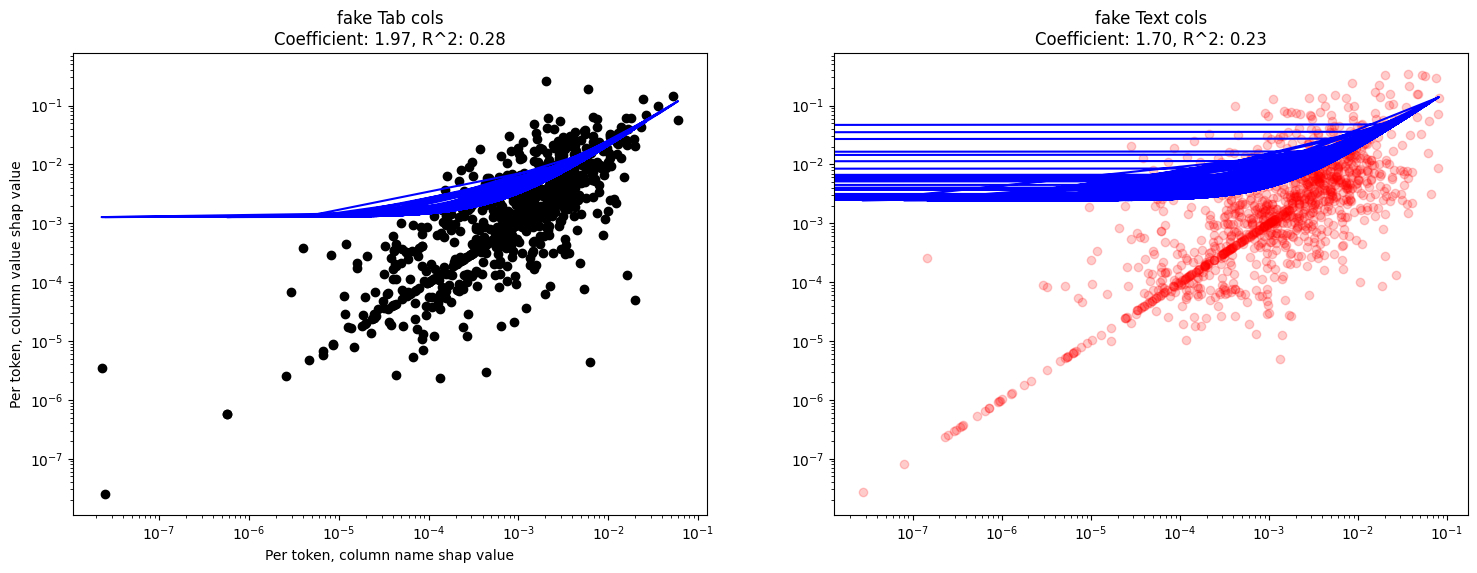


            #################
            jigsaw
            #################
            


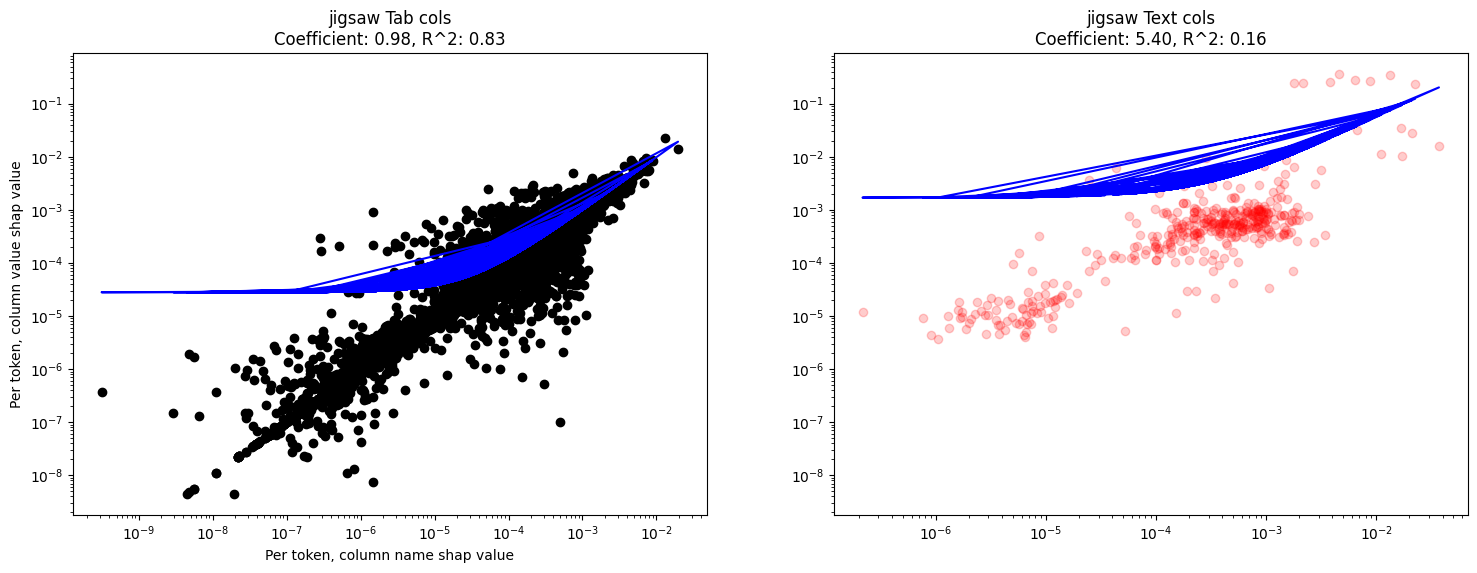


            #################
            kick
            #################
            


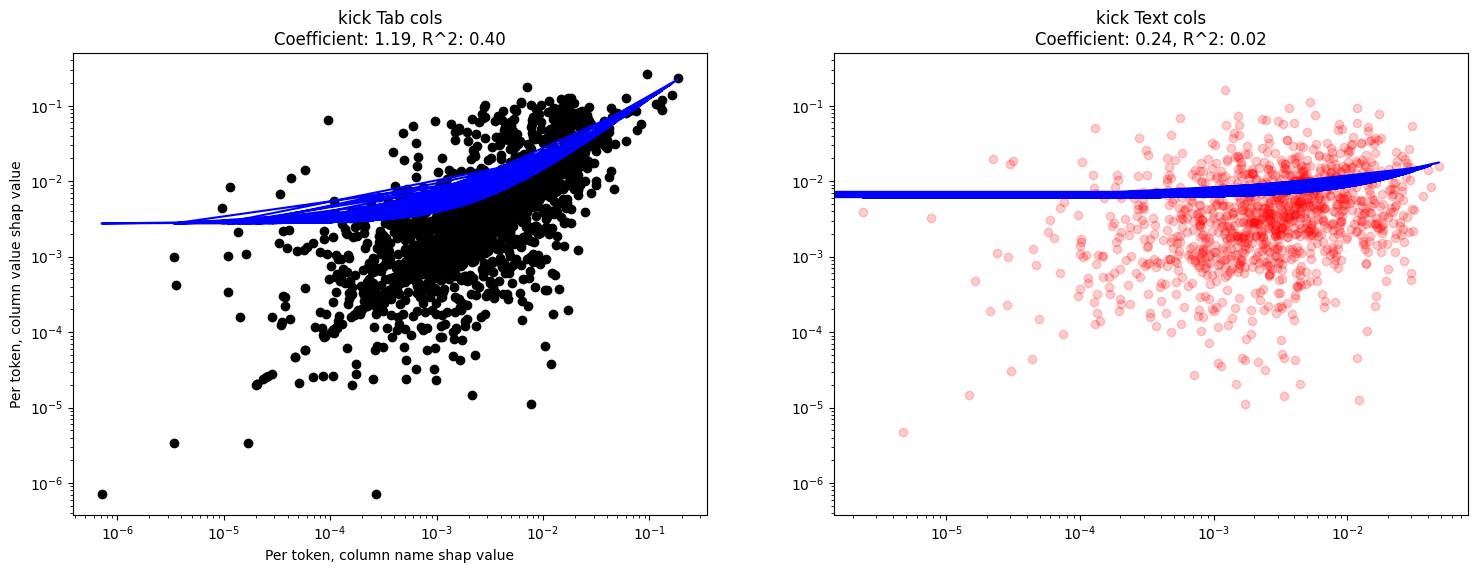


            #################
            wine
            #################
            


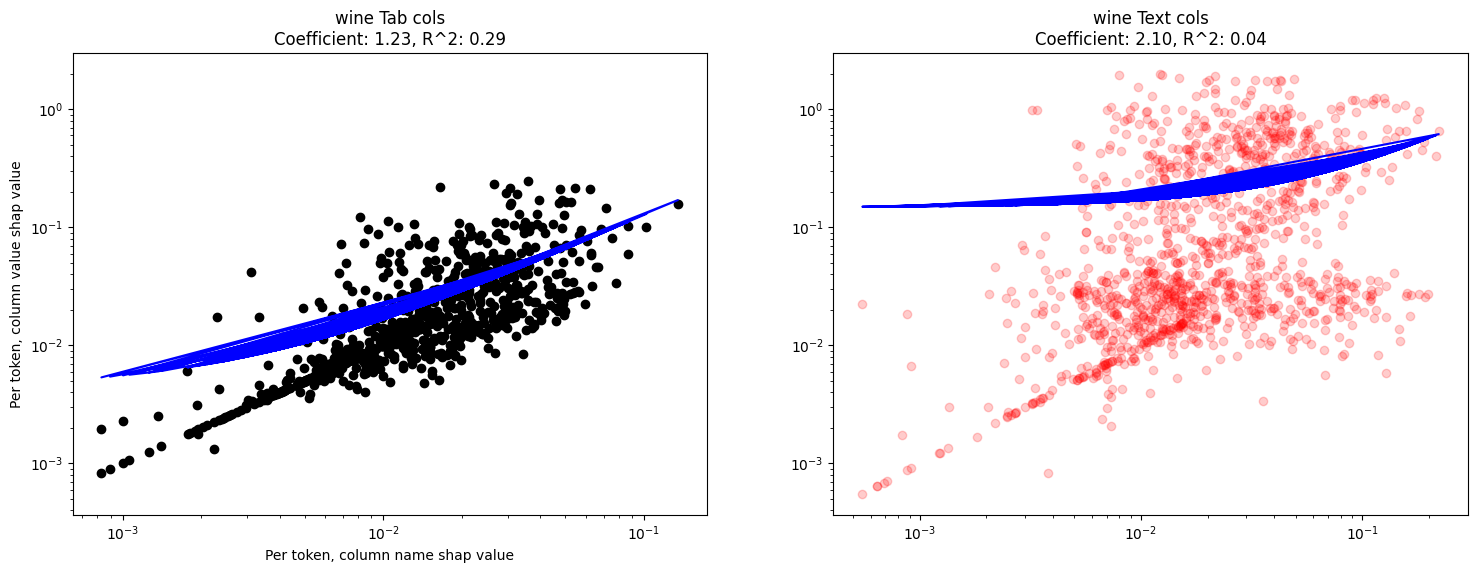


            #################
            imdb_genre
            #################
            


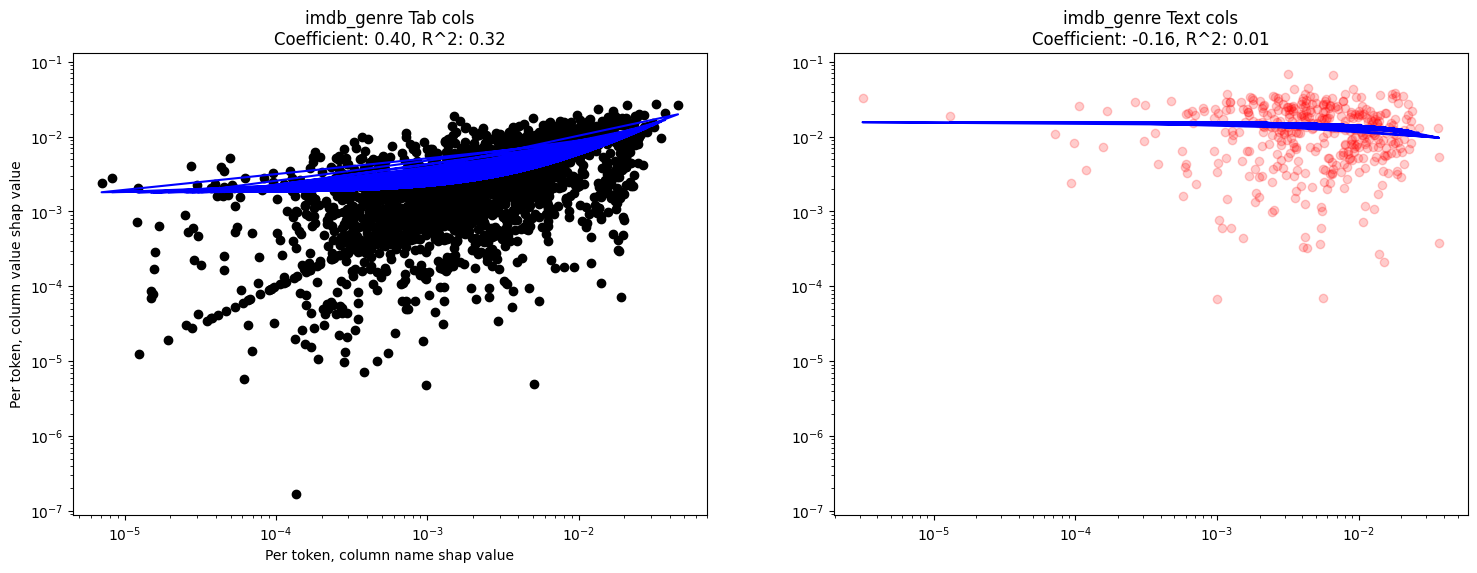


            #################
            prod_sent
            #################
            


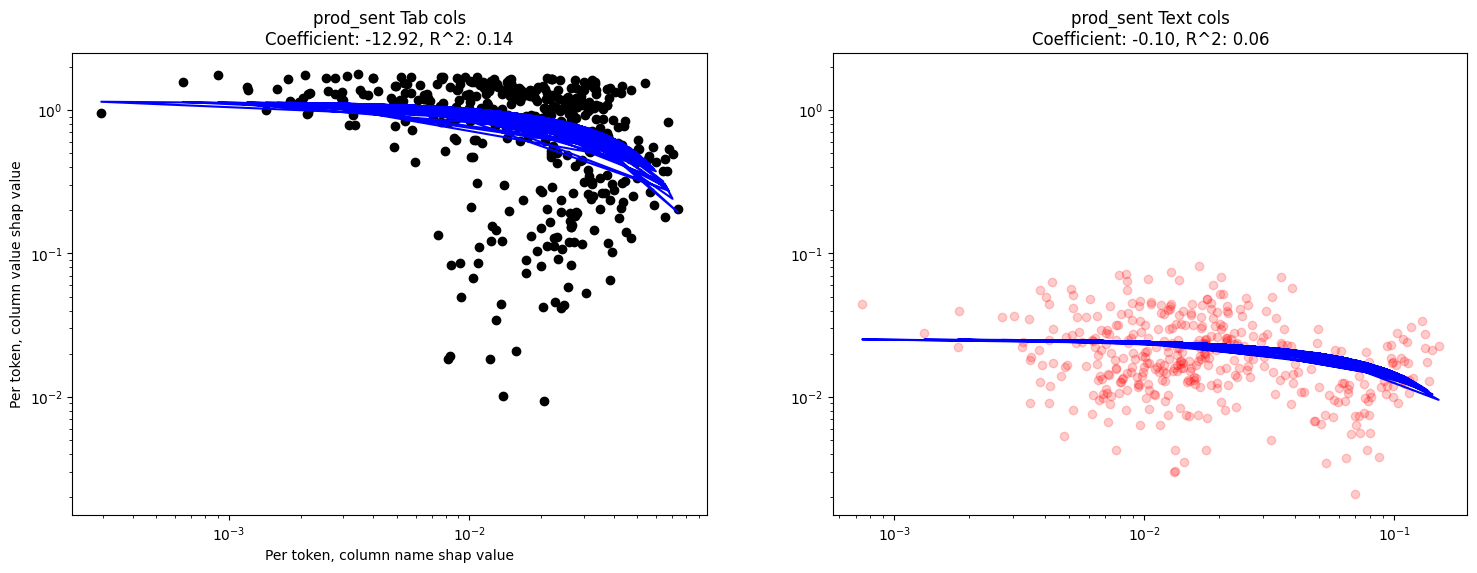

In [9]:
rel_df = pd.read_csv("../models/shap_vals_all_text_baseline_relative_df.csv")
for text_model_code, text_model_base in [
    ("disbert", "distilbert-base-uncased"),
    # ("drob", "distilroberta-base"),
    # ("bert", "bert-base-uncased"),
    # ("deberta", "microsoft/deberta-v3-small")
]:
    for ds_name in ["fake", "jigsaw", "kick", "wine", "imdb_genre", "prod_sent"]:
        print(
            f"""
            #################
            {ds_name}
            #################
            """
        )
        # Create a figure and axes
        fig, (ax1, ax2) = plt.subplots(
            1, 2, figsize=(18, 6)
        )  # Set figsize to (12, 6) for twice the width

        # Plot the tab columns
        # x1 = col_plus_colon[:, : len(di.tab_cols)].flatten()
        x1 = rel_df[
            (rel_df["ds_name"] == ds_name)
            &
            # (rel_df["text_model"] == text_model_code) &
            (rel_df["category"] == "tab")
        ]["col_rel_total"].values
        y1 = rel_df[
            (rel_df["ds_name"] == ds_name)
            &
            # (rel_df["text_model"] == text_model_code) &
            (rel_df["category"] == "tab")
        ]["val_rel_total"].values
        # x1 = rel_df[(rel_df["ds_name"] == ds_name)]["val_rel_total"].values
        # y1 = rel_df[(rel_df["ds_name"] == ds_name)]["col_rel_total"].values
        # set log scale
        ax1.set_xscale("log")
        ax1.set_yscale("log")
        ax1.plot(x1, y1, "o", color="black")

        # Add the best-fit line
        # Fit a first-degree (linear) polynomial
        coefficients1 = np.polyfit(x1, y1, 1)
        best_fit1 = np.polyval(coefficients1, x1)
        ax1.plot(x1, best_fit1, color="blue")

        # Calculate r^2 value
        correlation_matrix1 = np.corrcoef(x1, y1)
        correlation_coefficient1 = correlation_matrix1[0, 1]
        r_squared1 = correlation_coefficient1**2

        # Set the labels
        ax1.set_title(
            ds_name
            + " Tab cols\nCoefficient: {:.2f}, R^2: {:.2f}".format(
                coefficients1[0], r_squared1
            )
        )
        ax1.set_xlabel("Per token, column name shap value")
        ax1.set_ylabel("Per token, column value shap value")

        # Plot the text columns
        x2 = rel_df[
            (rel_df["ds_name"] == ds_name)
            &
            # (rel_df["text_model"] == text_model_code) &
            (rel_df["category"] == "text")
        ]["col_rel_total"].values
        y2 = rel_df[
            (rel_df["ds_name"] == ds_name)
            &
            # (rel_df["text_model"] == text_model_code) &
            (rel_df["category"] == "text")
        ]["val_rel_total"].values
        ax2.plot(x2, y2, "o", color="red", alpha=0.2)

        # Add the best-fit line
        # Fit a first-degree (linear) polynomial
        coefficients2 = np.polyfit(x2, y2, 1)
        best_fit2 = np.polyval(coefficients2, x2)
        # set log scale
        ax2.set_xscale("log")
        ax2.set_yscale("log")
        ax2.plot(x2, best_fit2, color="blue")

        # Calculate r^2 value
        correlation_matrix2 = np.corrcoef(x2, y2)
        correlation_coefficient2 = correlation_matrix2[0, 1]
        r_squared2 = correlation_coefficient2**2

        # Set the labels
        ax2.set_title(
            ds_name
            + " Text cols\nCoefficient: {:.2f}, R^2: {:.2f}".format(
                coefficients2[0], r_squared2
            )
        )
        ax1.set_xlabel("Per token, column name shap value")
        ax1.set_ylabel("Per token, column value shap value")

        # Share the y-axis
        ax1.get_shared_y_axes().join(ax1, ax2)

        # Show the plot
        plt.show()